In [5]:
#importing libraries and analysing the data
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train=pd.read_csv('B10_Sleep_dataset.csv')

train.head(10)
print(len(train.index))
print(train.info())


374
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


In [6]:
train.describe()
#data description

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Graphical Visulation of Different columns with respect to sleep disorder column




<Axes: xlabel='Sleep Disorder', ylabel='count'>

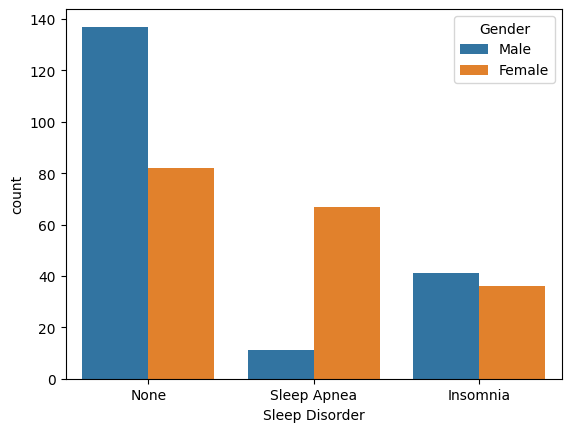

In [ ]:
sns.countplot(x='Sleep Disorder',hue='Gender',data=train)

<Axes: xlabel='Sleep Disorder', ylabel='count'>

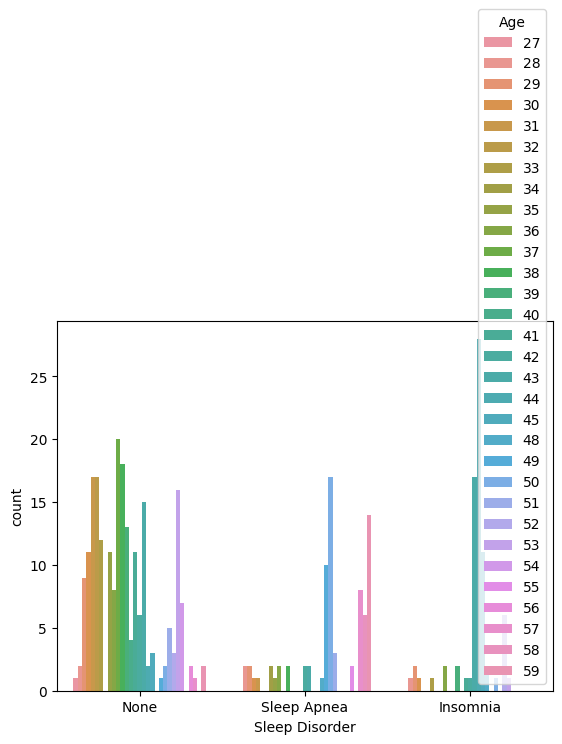

In [ ]:
sns.countplot(x='Sleep Disorder',hue='Age',data=train)

<Axes: xlabel='Sleep Disorder', ylabel='count'>

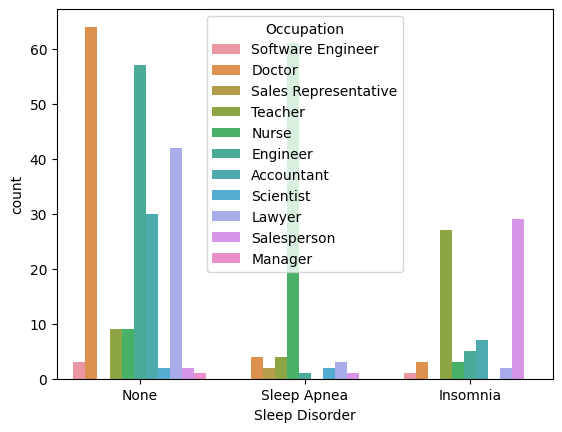

In [ ]:
sns.countplot(x='Sleep Disorder',hue='Occupation',data=train)

<Axes: xlabel='Sleep Disorder', ylabel='count'>

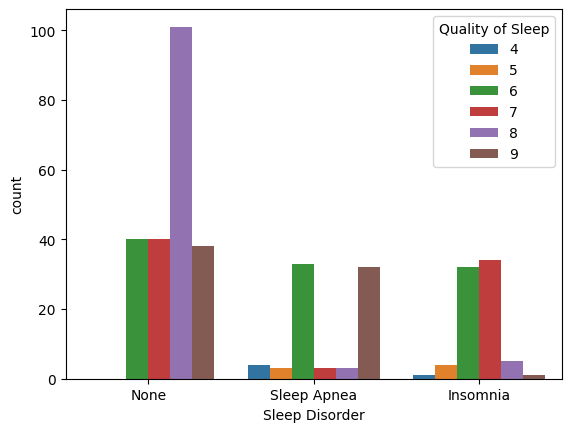

In [ ]:
sns.countplot(x='Sleep Disorder',hue='Quality of Sleep',data=train)

<Axes: xlabel='Sleep Disorder', ylabel='count'>

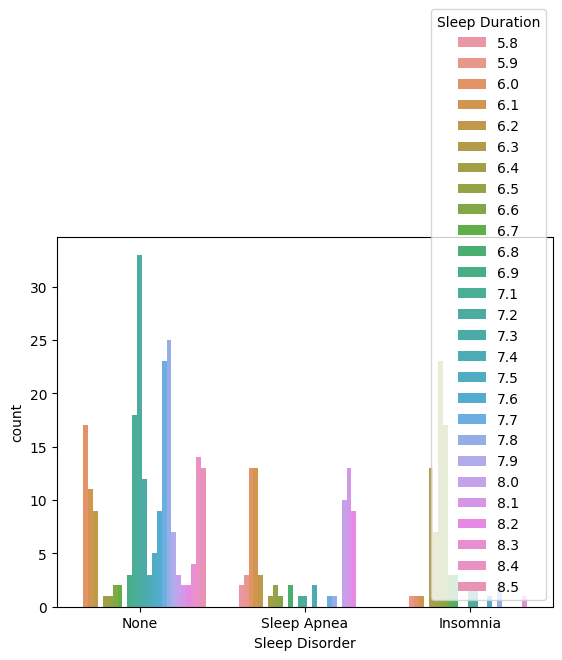

In [ ]:
sns.countplot(x='Sleep Disorder',hue='Sleep Duration',data=train)

<Axes: >

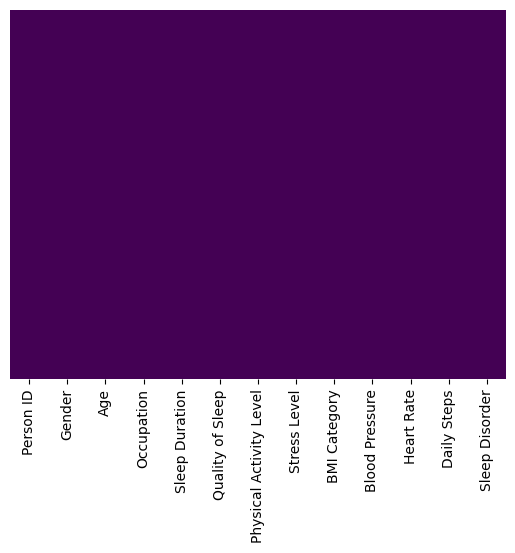

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#checking for null values

42.18449197860963


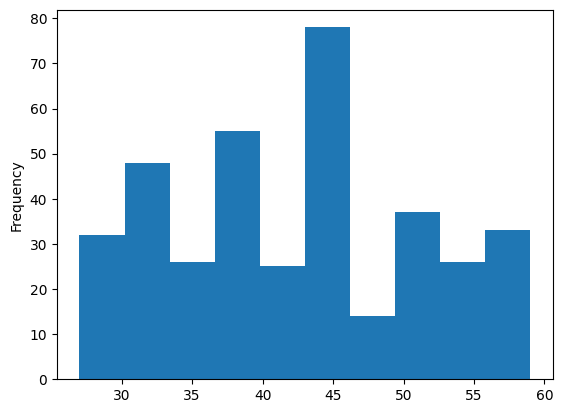

In [ ]:
train['Age'].plot.hist()
print(train['Age'].mean())
#mean of age graph just for analysing

<Axes: xlabel='Sleep Disorder', ylabel='count'>

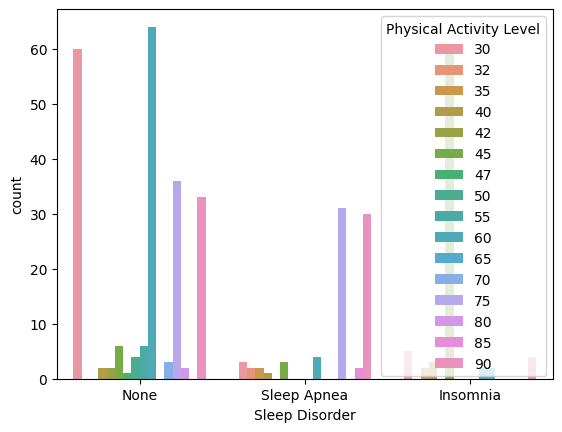

In [ ]:
sns.countplot(x='Sleep Disorder',hue='Physical Activity Level',data=train)

<Axes: xlabel='Sleep Disorder', ylabel='count'>

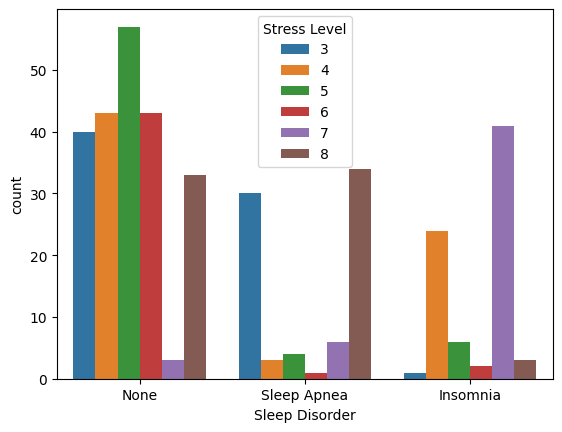

In [ ]:
sns.countplot(x='Sleep Disorder',hue='Stress Level',data=train)

<Axes: xlabel='Sleep Disorder', ylabel='count'>

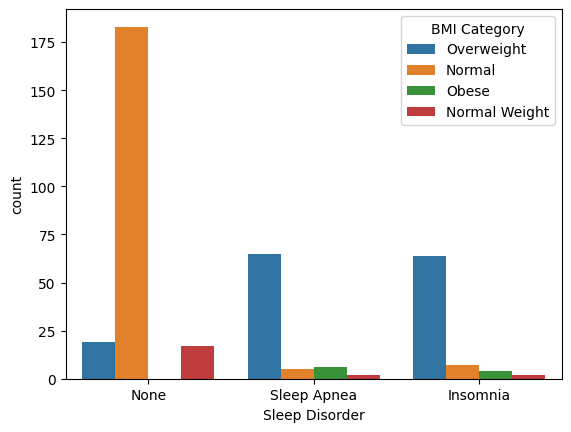

In [ ]:
sns.countplot(x='Sleep Disorder',hue='BMI Category',data=train)

<Axes: xlabel='Sleep Disorder', ylabel='count'>

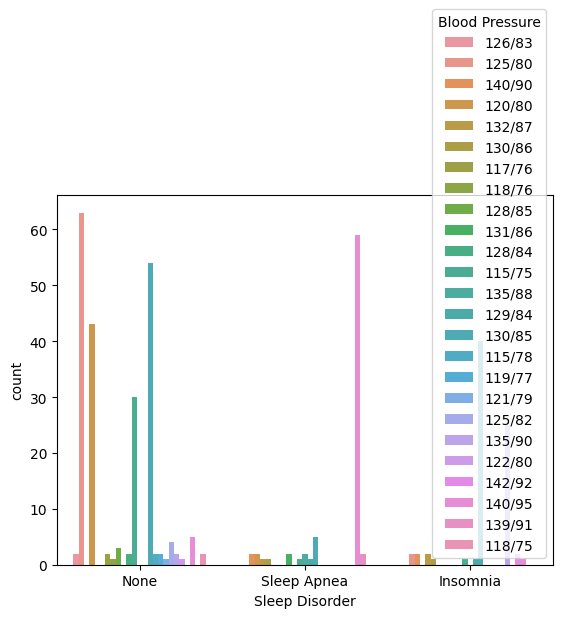

In [ ]:
sns.countplot(x='Sleep Disorder',hue='Blood Pressure',data=train)

<Axes: xlabel='Sleep Disorder', ylabel='count'>

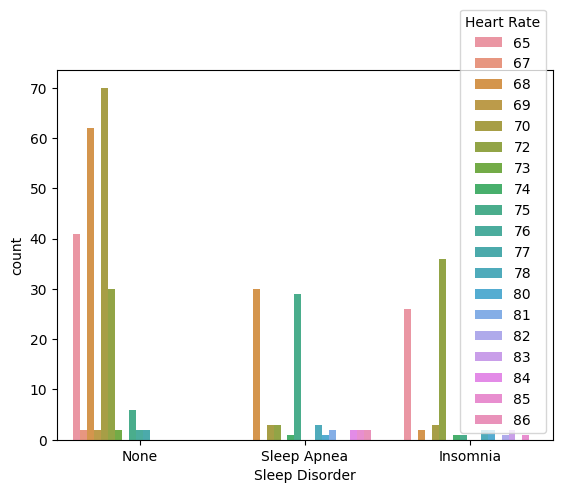

In [ ]:
sns.countplot(x='Sleep Disorder',hue='Heart Rate',data=train)

<Axes: xlabel='Sleep Disorder', ylabel='count'>

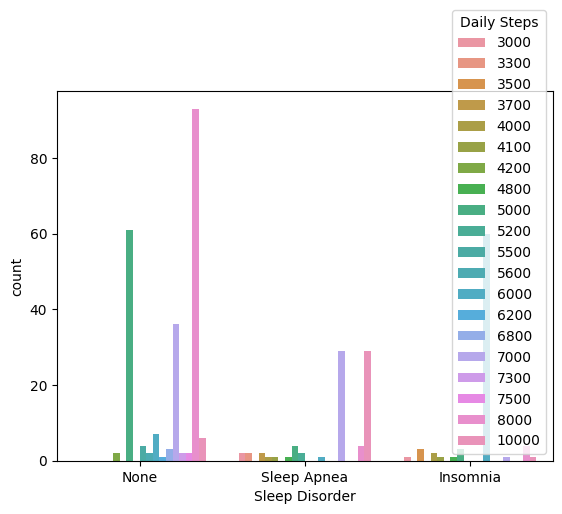

In [ ]:
sns.countplot(x='Sleep Disorder',hue='Daily Steps',data=train)

Putting dummy values for all the columns having object type dataset


In [7]:
disorder=pd.get_dummies(train['Sleep Disorder'])
disorder.drop(['Insomnia','Sleep Apnea'],axis=1,inplace=True)
disorder.head(10)

,None
0,1
1,1
2,1
3,0
4,0
5,0
6,0
7,1
8,1
9,1


In [8]:
sex=pd.get_dummies(train['Gender'])
sex.drop('Female',axis=1,inplace=True)
sex.head(10)

,Male
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [9]:
occupation=pd.get_dummies(train['Occupation'])
occupation.head(10)

,Accountant,Doctor,Engineer,Lawyer,Manager,Nurse,Sales Representative,Salesperson,Scientist,Software Engineer,Teacher
0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,1
7,0,1,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0


In [10]:
BMI=pd.get_dummies(train['BMI Category'])
BMI.head(10)

,Normal,Normal Weight,Obese,Overweight
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0


In [11]:
BP=pd.get_dummies(train['Blood Pressure'])
BP.head(10)

,115/75,115/78,117/76,118/75,118/76,119/77,120/80,121/79,122/80,125/80,...,130/85,130/86,131/86,132/87,135/88,135/90,139/91,140/90,140/95,142/92
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train=pd.concat([train,sex,occupation,BMI,BP,disorder],axis=1)
train.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,...,130/86,131/86,132/87,135/88,135/90,139/91,140/90,140/95,142/92,None
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,...,0,0,0,0,0,0,0,0,0,1
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,...,0,0,0,0,0,0,0,0,0,1
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,...,0,0,0,0,0,0,0,0,0,1
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,...,0,0,0,0,0,0,1,0,0,0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,...,0,0,0,0,0,0,1,0,0,0
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,...,0,0,0,0,0,0,1,0,0,0
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,...,0,0,0,0,0,0,1,0,0,0
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,...,0,0,0,0,0,0,0,0,0,1
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,...,0,0,0,0,0,0,0,0,0,1
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,...,0,0,0,0,0,0,0,0,0,1


In [13]:
train.drop(['Occupation','Gender','BMI Category','Blood Pressure','Sleep Disorder'],axis=1,inplace=True)
train.head(10)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Male,Accountant,...,130/86,131/86,132/87,135/88,135/90,139/91,140/90,140/95,142/92,None
0,1,27,6.1,6,42,6,77,4200,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,28,6.2,6,60,8,75,10000,1,0,...,0,0,0,0,0,0,0,0,0,1
2,3,28,6.2,6,60,8,75,10000,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4,28,5.9,4,30,8,85,3000,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5,28,5.9,4,30,8,85,3000,1,0,...,0,0,0,0,0,0,1,0,0,0
5,6,28,5.9,4,30,8,85,3000,1,0,...,0,0,0,0,0,0,1,0,0,0
6,7,29,6.3,6,40,7,82,3500,1,0,...,0,0,0,0,0,0,1,0,0,0
7,8,29,7.8,7,75,6,70,8000,1,0,...,0,0,0,0,0,0,0,0,0,1
8,9,29,7.8,7,75,6,70,8000,1,0,...,0,0,0,0,0,0,0,0,0,1
9,10,29,7.8,7,75,6,70,8000,1,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
train.drop('None',axis=1).head()
#dropping the None column which here stands for disorder column

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Male,Accountant,...,130/85,130/86,131/86,132/87,135/88,135/90,139/91,140/90,140/95,142/92
0,1,27,6.1,6,42,6,77,4200,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,28,6.2,6,60,8,75,10000,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,28,6.2,6,60,8,75,10000,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,28,5.9,4,30,8,85,3000,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5,28,5.9,4,30,8,85,3000,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
train['None'].head()


0    1
1    1
2    1
3    0
4    0
Name: None, dtype: uint8

Logistic Regression Model buliding starts


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('None',axis=1),
                                                    train['None'],test_size=0.30,
                                                    random_state=101)
#spliting of test and train dataset

In [16]:
from sklearn.linear_model import LogisticRegression
#importing the model


In [17]:
logmodel=LogisticRegression()
logmodel.fit(X_train,Y_train)
#appyling train dataset

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
predictions= logmodel.predict(X_test)
#predicting the test data

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
accuracy=confusion_matrix(Y_test,predictions)

In [21]:
accuracy

array([[41,  8],
       [ 4, 60]])

In [22]:
from sklearn.metrics import accuracy_score

Accuracy prediction


In [23]:
accuracy=accuracy_score(Y_test,predictions)
accuracy

0.8938053097345132

In [24]:
predictions
#prediction matrix

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1], dtype=uint8)